# ST2195 Coursework question 2 

### UOL Student Number 200549079

# Importing & Loading Necessary Packages 

In [1]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Working Directory

In [2]:
# Input your own directory where the Harvard Dataverse files are located within the code below.
os.chdir("C:\\Users\\Sudharsaan\\OneDrive\\SIM\\Year 2\\ST2195 Programming for Data Science\\Coursework\\Essential Harvard Dataverse Files")
os.getcwd()

'C:\\Users\\Sudharsaan\\OneDrive\\SIM\\Year 2\\ST2195 Programming for Data Science\\Coursework\\Essential Harvard Dataverse Files'

# Establishing connection with airlinemain_py database

In [3]:
conn = sqlite3.connect("airlinemain_py.db")

# Performing Query on question 2 of coursework

**Assumptions Made:**

Question 2 asks "Do older planes suffer more delays?". Before answering the question, it is necessary to make some assumptions in the absence of information regarding the variables in the planes-data.csv file. The assumptions are as follows:
- The "year" column in the plane-data.csv file is assumed to be the year the planes were manufactured. 
- The "Year" column in the ontime table created in the airlinemain_py.db file refers to the various years the planes were used to fly passengers. (Not an assumption but just an reiteration of what the variable means)

**Methodology used to answer the question:**

We will be using the value in the "Year" column in the ontime table & subtracting its value by the corresponding value in the "year" column by matching the tail number of the plane to calculate the age of the plane & answer the question regarding whether older planes suffer more delays. 

**Difficulties faced under the assumptions made:**

Based on the assumptions made, we observe negative values for the age of the plane which is not possible. Thus, we will consider these observations to be erroneous data & not include them in our analysis. 

## Querying the minimum & maximum year of the planes manufactured

We limit maximum plane manufacture year to be less than 2100 (arbitrarily large number) as the lack of such limits returns a result of NA. Similarly, we limit the minimum plane manufacture year to be more than 1900 as the lack of such limits returns a value of 0000. We choose 1900 & not 1950 or some later year as there are planes that were manufactured in 1946. 

We also know that the years the planes were flown given the dataset in the ontime table range from the years 2006 to 2007 as those are the dataset we have chosen to analyse. Thus, any plane that was manufactured later than 2007 but flown before 2007 can be considered to be erroneous data as (based on the assumptions made) it is not possible for a plane to be flown before it was manufactured. 

In [4]:
c = conn.cursor()

# Querying the most recent (maximum) year that planes were manufactured from the planes dataset (Based on assumptions made).
q2manufactureyearmax = c.execute('''
                                    SELECT max(year)
                                    FROM planes
                                    WHERE year < 2100''')

In [5]:
q2manufactureyearmax = pd.DataFrame(q2manufactureyearmax)
# Renaming column of the dataframe holding the query result. 
q2manufactureyearmax = q2manufactureyearmax.rename(columns={0 : "Max Year of Manufacture"})
q2manufactureyearmax

,Max Year of Manufacture
0,2008


In [6]:
# Querying the "oldest" (minimum) year that planes were manufactured from the planes dataset (Based on assumptions made).
q2manufactureyearmin = c.execute('''
                                    SELECT min(year)
                                    FROM planes
                                    WHERE year > 1900''') 

In [7]:
q2manufactureyearmin = pd.DataFrame(q2manufactureyearmin)
# Renaming column of the dataframe holding the query result. 
q2manufactureyearmin = q2manufactureyearmin.rename(columns={0 : "Min Year of Manufacture"})
q2manufactureyearmin

,Min Year of Manufacture
0,1946


## Querying the dataset to identify erroneous data

In [8]:
# We query values that would be erroneous as shown by the negative values of a plane's age if (ontime.Year - planes.year) < 0
# which indicates that the planes were flown before they were manufactured. 
q2erroneous1 = c.execute('''
                            SELECT ontime.Year, planes.year, (ontime.Year - planes.year)
                            FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                            WHERE (ontime.Year - planes.year) < 0
                            ORDER BY (ontime.Year - planes.year)''')

In [9]:
q2erroneous1 = pd.DataFrame(q2erroneous1)
q2erroneous1 = q2erroneous1.rename(columns={0 : "Year of flight", 1 : "Year of Manufacture", 2 : "Age of Plane"})
q2erroneous1

,Year of flight,Year of Manufacture,Age of Plane
0,2006,2007,-1
1,2006,2007,-1
2,2006,2007,-1
3,2006,2007,-1
4,2006,2007,-1
...,...,...,...
1812,2006,2007,-1
1813,2006,2007,-1
1814,2006,2007,-1
1815,2006,2007,-1


In [10]:
# We query the values in which the plane age is greater than 61 since the highest possible plane age given the minimum 
# manufacture year of 1946 & the latest year of plane flown of 2007 (from the dataset we have) is 61 (2007-1946 = 61). These 
# values are considered erroneous as it is not possible for the age of planes to be greater than 61 given the data available. 
# Furthermore, this query allow us to identify missing values which will not be used to answer question 2. This is because it is 
# not possible to fill those missing values with appropriate values given the lack of information provided by the dataset.
q2erroneous2 = c.execute('''
                            SELECT ontime.Year, planes.year, (ontime.Year - planes.year)
                            FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                            WHERE (ontime.Year - planes.year) > 61 
                            ORDER BY (ontime.Year - planes.year)''')

In [11]:
q2erroneous2 = pd.DataFrame(q2erroneous2)
# Renaming columns of the dataframe holding the query result. 
q2erroneous2 = q2erroneous2.rename(columns={0 : "Year of flight", 1 : "Year of Manufacture", 2 : "Age of Plane"})
q2erroneous2

,Year of flight,Year of Manufacture,Age of Plane
0,2006,None,2006
1,2006,None,2006
2,2006,None,2006
3,2006,None,2006
4,2006,None,2006
...,...,...,...
366488,2007,None,2007
366489,2007,None,2007
366490,2007,None,2007
366491,2007,None,2007


In [12]:
# We query the database to extract information regarding the total number of entries we have given the dataset from years 2006
# & 2007. This will provide us with a perspective regarding how many missing entries we have with respect to the total entries.
q2total = c.execute('''
                        SELECT ontime.Year, planes.year, (ontime.Year - planes.year)
                        FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum 
                        ORDER BY (ontime.Year - planes.year)''')

In [13]:
q2total = pd.DataFrame(q2total)
# Renaming columns of the dataframe holding the query result. 
q2total = q2total.rename(columns={0 : "Year of flight", 1 : "Year of Manufacture", 2 : "Age of Plane"})
q2total

,Year of flight,Year of Manufacture,Age of Plane
0,2006,None,NaN
1,2006,None,NaN
2,2006,None,NaN
3,2006,None,NaN
4,2006,None,NaN
...,...,...,...
12726993,2007,None,2007.0
12726994,2007,None,2007.0
12726995,2007,None,2007.0
12726996,2007,None,2007.0


**Observations from results above**

As shown in the query above, there are many observations of erronenous data. Values that are negative in the "Age of Plane" column of the **q2erroneous1** query result may be due to the assumptions being incorrect given the lack of information with regards to the description of the column variables in the planes dataset, or they may simply be values that were input wrongly. **(Only 1817 incorrect values)**

Values in the "Age of Plane" column that are large positive values (E.g. 2006 & 2007) in the **q2erroenous2** query result are a result of missing values in the "year" column of the planes-data.csv file. **(366493 missing values)**

We will be neglecting the values in these queries which will not be used in answering our question regarding whether older plane models suffer more delays due to the lack of our ability (& lack of information) to replace the missing & erroneous values with appropriate values. Furthermore, these erroneous data entries (based on assumptions made) only account for **2.89%** ((366493 + 1817)/12726998 x 100%) of the **total data entries (12.7 million approximately)** we have. Thus, there is still a great amount of information available to answer the question regarding whether older planes suffer more delays. 

## Querying the dataset to answer question regarding whether older planes suffer more delays

In [14]:
# Querying from airlinemain_py.db database to extract information regarding the year the plane was flown, the year the plane was
# manufactured, & the age of the plane (given the year of flight & manufacture). 
q2distribution = c.execute('''
                              SELECT ontime.Year, planes.year, (ontime.Year - planes.year)
                              FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                              WHERE (ontime.Year - planes.year) > -1 AND (ontime.Year - planes.year) < 62
                              ORDER BY (ontime.Year - planes.year)''')

In [15]:
q2distribution = pd.DataFrame(q2distribution)
# Renaming columns of the dataframe holding the query result. 
q2distribution = q2distribution.rename(columns={0 : "Year of flight", 1 : "Year of Manufacture", 2 : "Age of Plane"})
q2distribution

,Year of flight,Year of Manufacture,Age of Plane
0,2006,2006,0
1,2006,2006,0
2,2006,2006,0
3,2006,2006,0
4,2006,2006,0
...,...,...,...
11662267,2007,1956,51
11662268,2007,1956,51
11662269,2007,1956,51
11662270,2007,1956,51


Text(0.45, 1.05, 'Figure 2.1: Distribution of Number of Flights by Age of Plane')

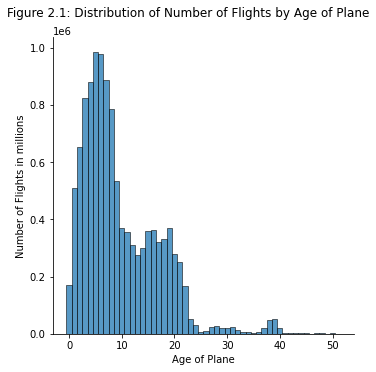

In [16]:
# Plotting a histogram to observe the distribution of number of flights by the age of plane. 
fig = sns.displot(q2distribution, x = "Age of Plane", discrete = True)

fig.set_axis_labels("Age of Plane", "Number of Flights in millions")
plt.title("Figure 2.1: Distribution of Number of Flights by Age of Plane", x = 0.45, y = 1.05, fontsize = 12)

**Observations from plot above**

The number of observations are significantly greater for plane models that are within the 2-9 years of age compared to those that are of 10-22 years of age. The number of observations for plane models that are older than 22 years are significantly lower compared to the number of observations of plane that have less than 22 years of age. 

It is important to note that greater number of observations allow for more accurate sample statistics as the greater the size of the sample, the closer the sample measures (E.g. mean, median, etc.) are to the true value of the population measures. Thus, the average arrival delay of planes that are older than 22 years of age may not be as accurate as those below 22 years of age due to the relatively small sample size compared to the sample size of planes that have less than 22 years of age. 

**Methology used to answer question**

Given the distribution of the number of flights by the age of planes, we shall:
- Plot a scatterplot on the average arrival delay based on the age of plane 
- Plot a scatterplot on the percentage of delayed flights based on age of plane

There will be a total of **4 scatterplots** in which 2 of the scatterplots (one of average arrival delay & the other on percentage of delayed flights) are based on the entire dataset of age of planes from 0 to 51 years of age while 2 of the other scatterplots (one on average arrival delay & the other on percentage of delayed flights) are based on part of the dataset (Age of planes from 0 to 22 years of age) that have relatively large sample size compared to the rest of the dataset.

We shall also plot a **regression line** on those scatterplots to observe how the average arrival delay & percentage of delayed flights vary when the age of plane increases for both the entire dataset & the "representative" sample. 

In [17]:
# Querying from airlinemain_py.db database to extract information regarding Age of Planes, their corresponding Average Arrival 
# Delay, & the corresponding number of flights of that age. (The total number of flights of each age helps us identify the 
# sample size we have for planes of different age.)
q2 = c.execute('''
                    SELECT (ontime.Year - planes.year), AVG(ArrDelay), COUNT(*)
                    FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                    WHERE (ontime.Year - planes.year) > -1 AND (ontime.Year - planes.year) < 62
                    GROUP BY (ontime.Year - planes.year)
                    ORDER BY (ontime.Year - planes.year) ASC''').fetchall()

In [18]:
q2 = pd.DataFrame(q2)
# Renaming columns of the dataframe holding the query result. 
q2 = q2.rename(columns={0 : "Age of Plane", 1 : "Average Arrival Delay in mins", 2 : "Number of Flights"})
q2

,Age of Plane,Average Arrival Delay in mins,Number of Flights
0,0,9.255117,169302
1,1,9.203893,508707
2,2,9.585009,651319
3,3,9.367449,822905
4,4,10.391609,879383
5,5,9.307230,986362
6,6,8.745948,978531
7,7,9.350719,886979
8,8,9.814324,784215
9,9,10.339470,534268


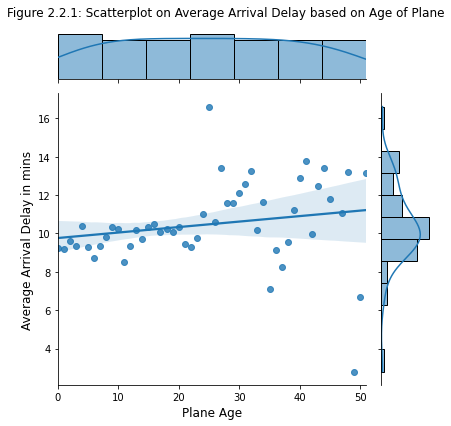

In [19]:
# Plotting a scatterplot of on the Average Arrival Delay based on Age of Plane which allows us to analyse how the age of plane 
# affects a plane's corresponding arrival delay.There are additional plots on the distribution of plane age & distribution of 
# average arrival delay in the form of histograms on the axes. (However, these histograms are not the main focus of this plot)
# We use a jointplot as it facilitates the implementation of regression lines in the using the "kind" argument in the code 
# below. 
scatterplot = sns.jointplot(x = "Age of Plane", y = "Average Arrival Delay in mins", data = q2, kind = "reg")

scatterplot.set_axis_labels("Plane Age", "Average Arrival Delay in mins", fontsize = 12)
scatterplot.fig.suptitle("Figure 2.2.1: Scatterplot on Average Arrival Delay based on Age of Plane", fontsize = 12)

plt.tight_layout()

**Observations from plot above**

We can observe from the linear regression line in **Figure 2.2.1** that generally as the age of the plane increases, the average arrival delay in minutes also increases. 

Though we observe that average arrival delay beyond 35 years of age is substantially lower than the planes that are less than 35 years of age, it is important to take note from the histogram in **Figure 2.1** above that the sample size of planes' age that are of **23 years & above** are much smaller compared to those lower than 23 years of age. Thus, their values may not be as representative of the true value of their corresponding average arrival delay.

In [20]:
# Subsetting the q2 dataset to only planes of age 0 to 23 as their sample sizes are significantly greater than that of planes 
# of age greater than 23 to create a "representative" dataset. 
q2representative = q2[:23]
q2representative

,Age of Plane,Average Arrival Delay in mins,Number of Flights
0,0,9.255117,169302
1,1,9.203893,508707
2,2,9.585009,651319
3,3,9.367449,822905
4,4,10.391609,879383
5,5,9.307230,986362
6,6,8.745948,978531
7,7,9.350719,886979
8,8,9.814324,784215
9,9,10.339470,534268


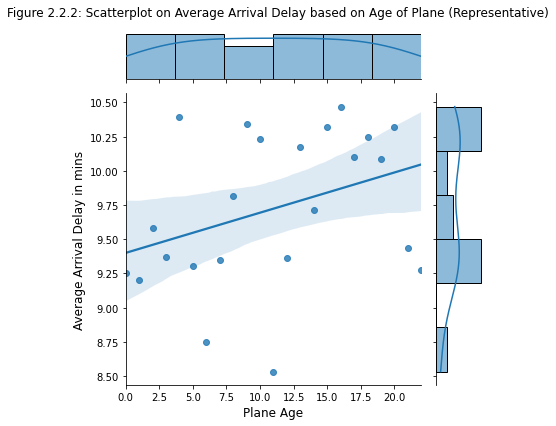

In [21]:
# Plotting a scatterplot & regression line of the "representative" dataset which consists of planes of age 0 to 23. We can 
# observe changes in the regression line given the subsetted data. 
scatterplot = sns.jointplot(x = "Age of Plane", y = "Average Arrival Delay in mins", data = q2representative, kind = "reg")

scatterplot.set_axis_labels("Plane Age", "Average Arrival Delay in mins", fontsize = 12)
scatterplot.fig.suptitle("Figure 2.2.2: Scatterplot on Average Arrival Delay based on Age of Plane (Representative)", fontsize = 12)

plt.tight_layout()

**Observations from plot above**

We can observe from the linear regression line in **Figure 2.2.2** that as the age of the plane increases, there is a observable increase in average arrival delay in minutes. The **regression line** in Figure 2.2.2 based on the representative sample is much more **steeper** compared to the regression line in Figure 2.2.1 based on the entire dataset (Age 0 to 51).

Thus, we can conclude in both cases of the entire dataset & the representative dataset that the average arrival delay increases as the age of plane increases. 

In [22]:
# Querying from airlinemain_py.db database to extract information regarding Age of Planes, their corresponding Average Arrival 
# Delay, the total number of flights of that age, the number of flights delayed of that age, & the percentage of flights delayed
# of that age. 
q2delaycount = c.execute('''
                            SELECT (ontime.Year - planes.year), (AVG(ArrDelay)), COUNT(*), SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                            FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                            WHERE (ontime.Year - planes.year) > -1 AND (ontime.Year - planes.year) < 62
                            GROUP BY (ontime.Year - planes.year)
                            ORDER BY (ontime.Year - planes.year) ASC''').fetchall()

In [23]:
q2delaycount = pd.DataFrame(q2delaycount)
# Renaming columns of the dataframe holding the query result. 
q2delaycount = q2delaycount.rename(columns={0 : "Age of Plane", 1 : "Average Arrival Delay in mins", 2 : "Total Number of Flights", 3 : "Number of Flights Delayed", 4 : "Percentage of Delayed Flights"})
q2delaycount

,Age of Plane,Average Arrival Delay in mins,Total Number of Flights,Number of Flights Delayed,Percentage of Delayed Flights
0,0,9.255117,169302,78122,46.143578
1,1,9.203893,508707,234077,46.014110
2,2,9.585009,651319,300714,46.170003
3,3,9.367449,822905,375452,45.625194
4,4,10.391609,879383,416091,47.316243
5,5,9.307230,986362,451127,45.736454
6,6,8.745948,978531,439680,44.932659
7,7,9.350719,886979,408798,46.088803
8,8,9.814324,784215,365293,46.580721
9,9,10.339470,534268,247882,46.396565


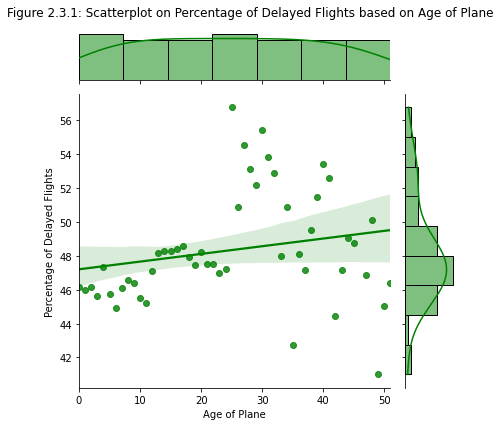

In [24]:
# Plotting a scatterplot of on the Percentage of Delayed FLights based on Age of Plane which allows us to analyse how the age 
# of plane affects a plane's corresponding percentage of flights delayed.
scatterplot = sns.jointplot(x = "Age of Plane", y = "Percentage of Delayed Flights", data = q2delaycount, kind = "reg", 
                            color = "green")

scatterplot.fig.suptitle("Figure 2.3.1: Scatterplot on Percentage of Delayed Flights based on Age of Plane")

plt.tight_layout()

**Observations from plot above**

The plot above shows the percentage of delayed flights based on the age of the plane. Based on the plot above, the regression line shows an increase in the percentage of delayed flights as the age of the plane increases. 

As previously observed, the percentage of delayed flights for planes that are older than 22 years may not be accurate due to the smaller sample size available relative to the sample size of planes that are 22 years old & less old. 

In [25]:
# Subsetting the q2representative dataset to only planes of age 0 to 23 as their sample sizes are significantly greater than 
# that of planes of age greater than 23 to create a "representative" dataset. 
q2delaycountrepresentative = q2delaycount[:23]
q2delaycountrepresentative

,Age of Plane,Average Arrival Delay in mins,Total Number of Flights,Number of Flights Delayed,Percentage of Delayed Flights
0,0,9.255117,169302,78122,46.143578
1,1,9.203893,508707,234077,46.014110
2,2,9.585009,651319,300714,46.170003
3,3,9.367449,822905,375452,45.625194
4,4,10.391609,879383,416091,47.316243
5,5,9.307230,986362,451127,45.736454
6,6,8.745948,978531,439680,44.932659
7,7,9.350719,886979,408798,46.088803
8,8,9.814324,784215,365293,46.580721
9,9,10.339470,534268,247882,46.396565


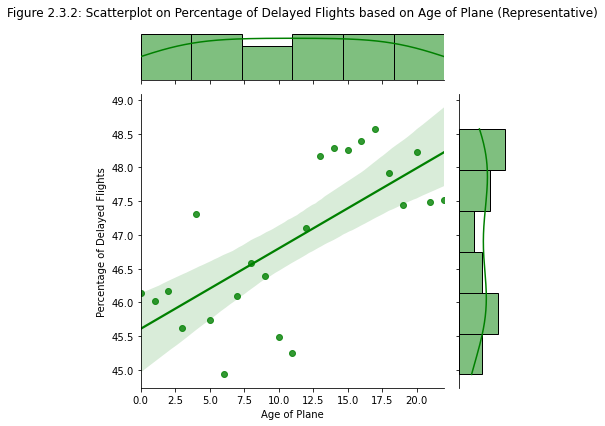

In [26]:
# Plotting a scatterplot & regression line of the "representative" dataset which consists of planes of age 0 to 23. We can 
# observe changes in the regression line given the subsetted data. 
scatterplot = sns.jointplot(x = "Age of Plane", y = "Percentage of Delayed Flights", data = q2delaycountrepresentative, 
                            kind = "reg", color = "green")

scatterplot.fig.suptitle("Figure 2.3.2: Scatterplot on Percentage of Delayed Flights based on Age of Plane (Representative)")

plt.tight_layout()

**Observations from plot above**

We can observe from the linear regression line in Figure 2.3.2 that as the age of the plane increases, there is a observable increase in percentage of delayed flights. The **regression line** in Figure 2.3.2 based on the representative sample is much more **steeper** compared to the regression line in Figure 2.3.1 based on the entire dataset (Age 0 to 51).

Thus, we can conclude in both cases of the entire dataset & the representative dataset that the percentage of delayed flight increases as the age of plane increases.

# Conclusion

Based on the scatter plot, bar plot, regression lines & data we have obtained, we make 2 observations;
1. We can observe from the linear regression line (blue) that the **average arrival delay in mins of planes increases** as the **age of the plane increases**.
2. We can also observe from the linear regression line (green) that the **percentage of delayed flights increases** as the **age of the plane increases**. 

The observations made above are consistent for both the entire dataset (Plane Age 0 to 51) & the "representative" dataset (Plane Age 0 to 22) which the **regression line** based on the **"representative" dataset** being **steeper** than the **regression line** based on the **entire dataset**.  

We also note that:
- The sample size of planes older than 22 years of age (based on the histogram in Figure 2.1) are significantly lower than those that are less than 23 years of age. This indicates that there is possibility for the sample measures (e.g. mean) for planes older than 22 years of age to not be as representative of the true value of its population compared to the planes less than 23 years of age. 
    - This may explain the significantly lower values of average arrival delay & percentage of delayed flights for some of the planes that are older than 35 years of age. 
    
**Given the information obtained, we conclude that older planes suffer more delays.**

In [27]:
# Closing connection to airlinemain_py.db
conn.close()